In [1]:
import pandas as pd
perf = pd.read_pickle('buyapple_out.pickle') # read in perf DataFrame
perf.head()

,period_open,period_close,ending_cash,portfolio_value,longs_count,shorts_count,long_value,short_value,long_exposure,pnl,...,benchmark_volatility,alpha,beta,sharpe,sortino,treasury_period_return,max_drawdown,max_leverage,excess_return,algorithm_period_return
2016-01-04 21:00:00+00:00,2016-01-04 14:31:00+00:00,2016-01-04 21:00:00+00:00,1.000000e+07,1.000000e+07,0,0,0.0,0.0,0.0,0.00000,...,NaN,None,None,NaN,NaN,0.0,0.000000e+00,0.000000,0.0,0.000000e+00
2016-01-05 21:00:00+00:00,2016-01-05 14:31:00+00:00,2016-01-05 21:00:00+00:00,9.998972e+06,9.999999e+06,1,0,1027.1,0.0,1027.1,-0.52355,...,0.0,None,None,-11.224972,-11.224972,0.0,-5.235500e-08,0.000103,0.0,-5.235500e-08
2016-01-06 21:00:00+00:00,2016-01-06 14:31:00+00:00,2016-01-06 21:00:00+00:00,9.997965e+06,9.999979e+06,1,0,2014.0,0.0,2014.0,-20.61350,...,0.0,None,None,-9.516452,-9.394902,0.0,-2.113705e-06,0.000201,0.0,-2.113705e-06
2016-01-07 21:00:00+00:00,2016-01-07 14:31:00+00:00,2016-01-07 21:00:00+00:00,9.997000e+06,9.999893e+06,1,0,2893.5,0.0,2893.5,-85.49225,...,0.0,None,None,-10.479703,-9.623685,0.0,-1.066293e-05,0.000289,0.0,-1.066293e-05
2016-01-08 21:00:00+00:00,2016-01-08 14:31:00+00:00,2016-01-08 21:00:00+00:00,9.996030e+06,9.999908e+06,1,0,3878.4,0.0,3878.4,14.80520,...,0.0,None,None,-7.365239,-7.412520,0.0,-1.066293e-05,0.000388,0.0,-9.182410e-06


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'AAPL Stock Price')

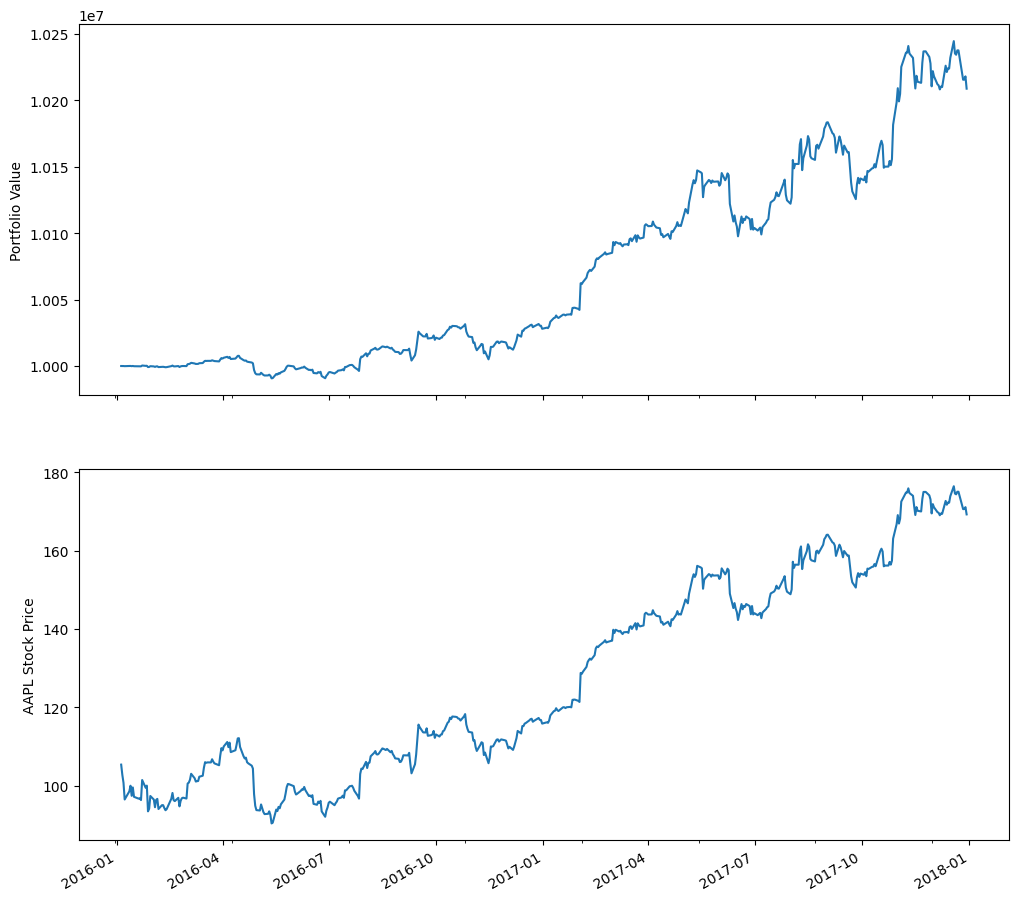

In [2]:
%pylab inline
figsize(12, 12)
import matplotlib.pyplot as plt

ax1 = plt.subplot(211)
perf.portfolio_value.plot(ax=ax1)
ax1.set_ylabel('Portfolio Value')
ax2 = plt.subplot(212, sharex=ax1)
perf.AAPL.plot(ax=ax2)
ax2.set_ylabel('AAPL Stock Price')

In [3]:
%load_ext zipline

In [6]:
%%zipline --start 2016-1-1 --end 2018-1-1

UsageError: %%zipline is a cell magic, but the cell body is empty. Did you mean the line magic %zipline (single %)?


In [11]:
from zipline.api import symbol, order, record
from zipline import run_algorithm
import pandas as pd
import pandas_datareader.data as web

In [10]:
def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data.current(symbol('AAPL'), "price"))

In [17]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime

# 'initialize'와 'handle_data' 함수가 스크립트의 다른 곳에서 정의되었다고 가정합니다.

# S&P 500 데이터 로드
start = datetime(2020, 1, 1)
end = datetime(2020, 12, 31)
sp500 = web.DataReader('SP500', 'fred', start, end).SP500

# NA 값을 채우지 않고 일일 수익률 계산
benchmark_returns = sp500.pct_change(fill_method=None)

# start와 end 날짜를 pd.Timestamp로 변환하고 UTC로 표준화
start = pd.Timestamp(start).tz_localize('UTC').tz_convert(None)
end = pd.Timestamp(end).tz_localize('UTC').tz_convert(None)

result = run_algorithm(
    start=start,
    end=end,
    initialize=initialize,
    handle_data=handle_data,
    capital_base=100000,
    benchmark_returns=benchmark_returns,
    bundle='quandl',
    data_frequency='daily'
)

Cannot place order for AAPL, as it has de-listed. Any existing positions for this asset will be liquidated on 2018-03-28 00:00:00.
/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/zipline/finance/ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns
Cannot place order for AAPL, as it has de-listed. Any existing positions for this asset will be liquidated on 2018-03-28 00:00:00.
Cannot place order for AAPL, as it has de-listed. Any existing positions for this asset will be liquidated on 2018-03-28 00:00:00.
Cannot place order for AAPL, as it has de-listed. Any existing positions for this asset will be liquidated on 2018-03-28 00:00:00.
Cannot place order for AAPL, as it has de-listed. Any existing positions for th

In [21]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-02 21:00:00+00:00 to 2020-12-31 21:00:00+00:00
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   period_open              253 non-null    datetime64[ns, UTC]
 1   period_close             253 non-null    datetime64[ns, UTC]
 2   long_exposure            253 non-null    float64            
 3   pnl                      253 non-null    float64            
 4   short_exposure           253 non-null    float64            
 5   capital_used             253 non-null    float64            
 6   orders                   253 non-null    object             
 7   transactions             253 non-null    object             
 8   gross_leverage           253 non-null    float64            
 9   positions                253 non-null    object             
 10  net_leverage             253 non-null    float64 

In [22]:
for col in result.columns:
    print('='*10)
    print(col)
    print(result[col].value_counts())

period_open
period_open
2020-01-02 14:31:00+00:00    1
2020-09-10 13:31:00+00:00    1
2020-08-21 13:31:00+00:00    1
2020-08-24 13:31:00+00:00    1
2020-08-25 13:31:00+00:00    1
                            ..
2020-05-11 13:31:00+00:00    1
2020-05-12 13:31:00+00:00    1
2020-05-13 13:31:00+00:00    1
2020-05-14 13:31:00+00:00    1
2020-12-31 14:31:00+00:00    1
Name: count, Length: 253, dtype: int64
period_close
period_close
2020-01-02 21:00:00+00:00    1
2020-09-10 20:00:00+00:00    1
2020-08-21 20:00:00+00:00    1
2020-08-24 20:00:00+00:00    1
2020-08-25 20:00:00+00:00    1
                            ..
2020-05-11 20:00:00+00:00    1
2020-05-12 20:00:00+00:00    1
2020-05-13 20:00:00+00:00    1
2020-05-14 20:00:00+00:00    1
2020-12-31 21:00:00+00:00    1
Name: count, Length: 253, dtype: int64
long_exposure
long_exposure
0.0    253
Name: count, dtype: int64
pnl
pnl
0.0    253
Name: count, dtype: int64
short_exposure
short_exposure
0.0    253
Name: count, dtype: int64
capital_used
